# Document Similarity

There are several measures of similarity between documents. Some, but not all, exploit the vector representations of documents.

In [1]:
from google.colab import drive
drive.mount('/content/drive')  # Add My Drive/<>

import os
os.chdir('drive/My Drive')
os.chdir('Books_Writings/NLPBook/')

Mounted at /content/drive


In [2]:
%%capture
%pylab inline
import pandas as pd
import os
from IPython.display import Image
# %load_ext rpy2.ipython

## Cosine Similarity in the Text Domain

In this segment we will learn some popular functions on text that are used in practice. One of the first things we like to do is to find similar text or like sentences (think of web search as one application). Since documents are vectors in the TDM, we may want to find the closest vectors or compute the distance between vectors.

$$
\cos(\theta) = \frac{A \cdot B}{||A|| \cdot ||B||}
$$


where $||A|| = \sqrt{A \cdot A}$, is the dot product of $A$ with itself, also known as the norm of $A$. This gives the cosine of the angle between the two vectors and is zero for orthogonal vectors and 1 for identical vectors.

For a collection of distance measures, see: https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa

In [3]:
#COSINE DISTANCE OR SIMILARITY
A = array([0,3,4,1,7,0,1])
B = array([0,4,3,0,6,1,1])
cos = A.dot(B)/(sqrt(A.dot(A)) * sqrt(B.dot(B)))
print('Cosine similarity = ',cos)

#Using sklearn
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([A, B], dense_output=True)

Cosine similarity =  0.9682727993019339


array([[1.       , 0.9682728],
       [0.9682728, 1.       ]])

## Minimum Edit Distance

The MED is the minimum number of edits needed to transform one string into another. The strings could be words or sentences or even documents. This is also known as the Levenshtein distance.

For example, to convert Apple into Amazon, we need to change p->m, p->a, l->z, e->o, add n. This entails 5 simple operations.

**Properties**:

1. Zero only for identical strings.
2. Minimum = the difference of the sizes of the two strings.
3. Maximum = length of the longer string.
4. Satisfies the Triangle Inequality: The Levenshtein distance between two strings is no greater than the sum of their Levenshtein distances from a third string.


See the Lazy Prices paper: https://hbswk.hbs.edu/item/lazy-prices, which uses MED for document similarity. Get the published paper through the library for free: https://onlinelibrary.wiley.com/doi/epdf/10.1111/jofi.12885

(Adapted from https://github.com/kristinauko/challenge_100/blob/master/day28.py)

In [4]:
def min_edit_distance(string1, string2):

    if len(string1) > len(string2):
        difference = len(string1) - len(string2)
        string1[:difference]

    elif len(string2) > len(string1):
        difference = len(string2) - len(string1)
        string2[:difference]

    else:
        difference = 0

    for i in range(min(len(string1),len(string2))):
        if string1[i] != string2[i]:
            difference += 1

    return difference

print(min_edit_distance("Amazon", "Apple"))
print(min_edit_distance("Amazon", "Amazing"))

5
2


## Simple Similarity

(Example: Used in the Lazy Prices [paper](https://onlinelibrary.wiley.com/doi/full/10.1111/jofi.12885).)

This measure compares two documents word by word or character by character. It uses an old document $D_1$ and a new document $D_2$ and counts the additions, deletions, and changes of words, normalized by the sum of words in the two documents.

It is a simple side-by-side comparison method. Much like the function “Track Changes” in Microsoft Word or the function “diff” in Unix/Linux terminal.

First we look at MED at the word level and then consider Simple Similarity.

In [5]:
import os
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
import difflib  # https://docs.python.org/2/library/difflib.html
from nltk.tokenize import word_tokenize

D1 = "Some areas around the world that were devastated by the coronavirus in the spring — and are now tightening rules to head off a second wave — are facing resistance from residents who are exhausted, confused and frustrated."
print(D1, "\n")
D1 = word_tokenize(D1)

D2 = "Some parts of the world devastated by the terrible coronavirus in the winter — have now tightened rules to head off a second wave but are facing resistance from residents who are exhausted, bewildered and angry."
print(D2, "\n")
D2 = word_tokenize(D2)

print("Length D1: ",len(D1[:5]),D1[:5])
print("Length D2: ",len(D2[:5]),D2[:5])
print("MED =",min_edit_distance(D1[:5],D2[:5]))

print("Length D1: ",len(D1),D1)
print("Length D2: ",len(D2),D2)
print("MED =",min_edit_distance(D1,D2))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Some areas around the world that were devastated by the coronavirus in the spring — and are now tightening rules to head off a second wave — are facing resistance from residents who are exhausted, confused and frustrated. 

Some parts of the world devastated by the terrible coronavirus in the winter — have now tightened rules to head off a second wave but are facing resistance from residents who are exhausted, bewildered and angry. 

Length D1:  5 ['Some', 'areas', 'around', 'the', 'world']
Length D2:  5 ['Some', 'parts', 'of', 'the', 'world']
MED = 2
Length D1:  40 ['Some', 'areas', 'around', 'the', 'world', 'that', 'were', 'devastated', 'by', 'the', 'coronavirus', 'in', 'the', 'spring', '—', 'and', 'are', 'now', 'tightening', 'rules', 'to', 'head', 'off', 'a', 'second', 'wave', '—', 'are', 'facing', 'resistance', 'from', 'residents', 'who', 'are', 'exhausted', ',', 'confused', 'and', 'frustrated', '.']
Length D2:  38 ['Some', 'parts', 'of', 'the', 'world', 'devastated', 'by', 'the', 

In [ ]:
res = list(difflib.ndiff(D1,D2))
print("DIFFs =",res)
nplus = len([j for j in res if j[0].startswith('+')])
nminus = len([j for j in res if j[0].startswith('-')])
print("SIMPSIM =",nplus,nminus,(nplus+nminus)/(len(D1)+len(D2)))

DIFFs = ['  Some', '- areas', '- around', '+ parts', '+ of', '  the', '  world', '- that', '- were', '  devastated', '  by', '  the', '+ terrible', '  coronavirus', '  in', '  the', '- spring', '+ winter', '  —', '+ have', '- and', '- are', '  now', '- tightening', '+ tightened', '  rules', '  to', '  head', '  off', '  a', '  second', '  wave', '- —', '+ but', '  are', '  facing', '  resistance', '  from', '  residents', '  who', '  are', '  exhausted', '  ,', '- confused', '+ bewildered', '  and', '- frustrated', '+ angry', '  .']
SIMPSIM = 9 11 0.2564102564102564


## Sentence Similarity via Language Model Representation

We can determine sentence similarity based on raw text using set-based similarity methods, as we will see later in this notebook.

However, computing similarity is basically a mathematical operation and requires quantification of text into vectors, matrices, tensors. We have seen an example of such similarity in the computation of cosine similarity above. In that example, we used simple word count vectors.

However, there are other ways of transforming sentences into fixed-length vectors so that we can compute cosine similarity. These are known as "embeddings", i.e., we convert the text of a sentence into a numeric vector of dimension $n$ which can be thought of as an embedding of that sentence into $n$-dimensional space.

Two popular ways this is done is using traditional word embeddings such as word2vec and BERT model embeddings. Word2vec creates word embeddings and there is a corresponding package for sentence enbeddings, sent2vec.

In [6]:
!pip install sent2vec

In [7]:
from scipy import spatial # for cosine distance
from sent2vec.vectorizer import Vectorizer # uses DistilBERT

sentences = [
    "There are several approaches to learn NLP.",
    "BERT is an amazing NLP language model.",
    "We can use embedding, encoding, or vectorizing to represent language.",
]

vectorizer = Vectorizer()
vectors_bert = vectorizer.run(sentences)
vectors_bert = vectorizer.vectors

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


In [8]:
print(len(vectors_bert))
print([len(v) for v in vectors_bert])
print(vectors_bert[0])

3
[768, 768, 768]
[-2.26823017e-01 -1.47761062e-01 -5.47579350e-03 -3.04903507e-01
 -3.22078824e-01 -1.62703261e-01  2.03426387e-02  1.00655407e-01
  3.73837091e-02 -5.03204226e-01 -1.22439943e-01  1.63336441e-01
  1.29842563e-02  6.99332803e-02  3.26597206e-02  3.87874156e-01
 -7.58709095e-04  2.40361437e-01 -1.91940039e-01 -2.15191051e-01
 -1.55010313e-01 -5.68637326e-02  1.55610666e-01 -8.65276679e-02
  8.88356240e-04 -6.96205720e-02  7.45741278e-02  9.62956548e-02
  2.06479847e-01 -6.76913932e-02 -9.84049365e-02  4.25805241e-01
 -1.33869514e-01 -2.16157615e-01  1.26786023e-01  6.81602731e-02
  3.96859676e-01  1.13230199e-01  4.18778628e-01  3.79229076e-02
 -1.06499501e-01  9.64720249e-02  1.49633139e-01  9.64184999e-02
 -4.75690663e-02 -1.01827666e-01 -2.63574839e+00  1.65038556e-02
 -4.71193939e-01 -4.67932016e-01 -1.86669126e-01  2.94502199e-01
  9.48905423e-02  5.40360272e-01  8.56129639e-03  3.07039082e-01
 -3.35935831e-01  1.45308673e-01  1.37860700e-01  2.19708443e-01
  9.555

In [ ]:
print(sentences)
dist_1 = 1 - spatial.distance.cosine(vectors_bert[0], vectors_bert[1]) # Similarity = 1 - Distance
print(dist_1)
dist_2 = 1 - spatial.distance.cosine(vectors_bert[0], vectors_bert[2])
print(dist_2)
dist_3 = 1 - spatial.distance.cosine(vectors_bert[1], vectors_bert[2])
print(dist_3)

['There are several approaches to learn NLP.', 'BERT is an amazing NLP language model.', 'We can use embedding, encoding, or vectorizing to represent language.']
0.9422925349756553
0.8620276274855502
0.8503696792267201


To summarize, here is a graphic that depicts various distance measures.

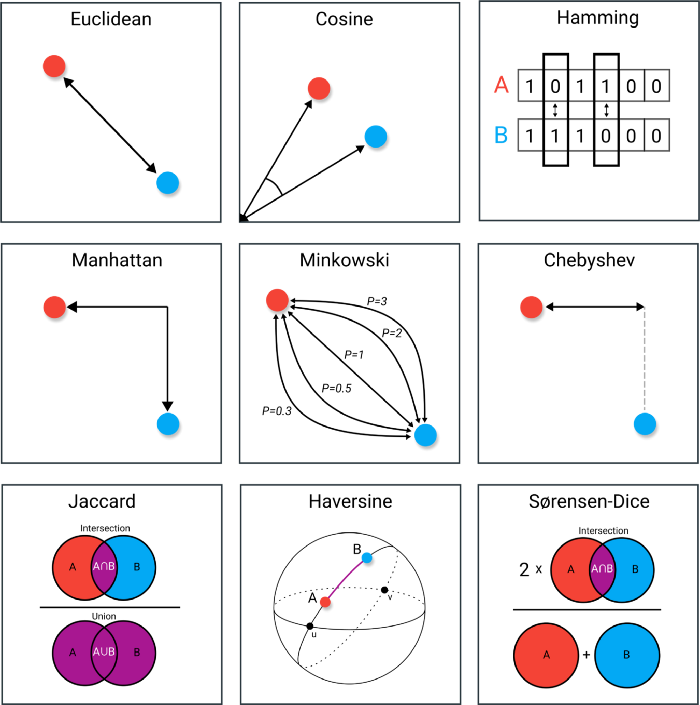

In [ ]:
Image("NLP_images/Distance_Measures_in_DataScience.png", width=500)